In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [372]:
penguins_Iter = pd.read_csv("penguins_lter.csv")
penguins_Size = pd.read_csv("penguins_size.csv")

In [373]:
penguins_Size.shape

(344, 7)

In [374]:
penguins_Size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [375]:
penguins_Size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [376]:
penguins_Size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

[Text(0.5, 1.0, 'Pinguins por ilha')]

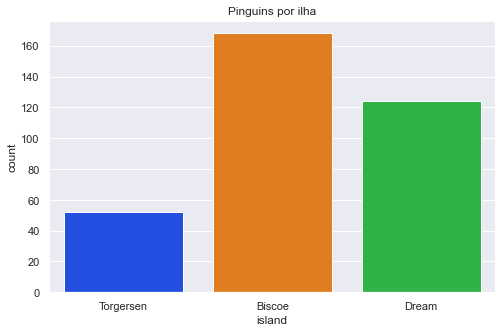

In [377]:
sequential_colors = sns.color_palette("bright", 4)
plt.figure(figsize=(8, 5))
sns.countplot(data=penguins_Size,x='island',palette=sequential_colors).set(title='Pinguins por ilha')

[Text(0.5, 1.0, 'Pinguins por espécie')]

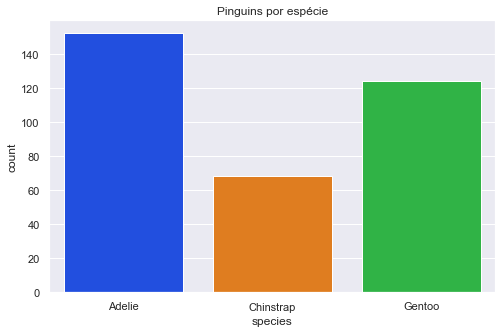

In [378]:
sequential_colors = sns.color_palette("bright", 4)
plt.figure(figsize=(8, 5))
sns.countplot(data=penguins_Size,x='species',palette=sequential_colors).set(title='Pinguins por espécie')

[Text(0.5, 1.0, 'Pinguins por sexo')]

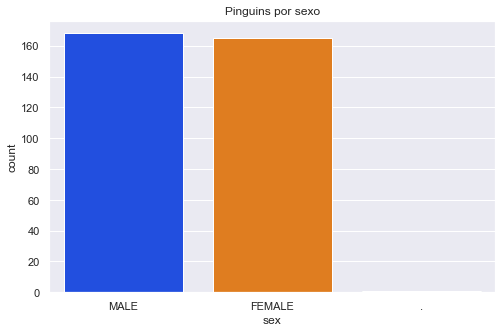

In [379]:
sequential_colors = sns.color_palette("bright", 4)
plt.figure(figsize=(8, 5))
sns.countplot(data=penguins_Size,x='sex',palette=sequential_colors).set(title='Pinguins por sexo')

In [380]:
penguins_Size.query('sex == "."')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [381]:
penguins_Size.drop([336], inplace = True)

[Text(0.5, 1.0, 'Pinguins por sexo')]

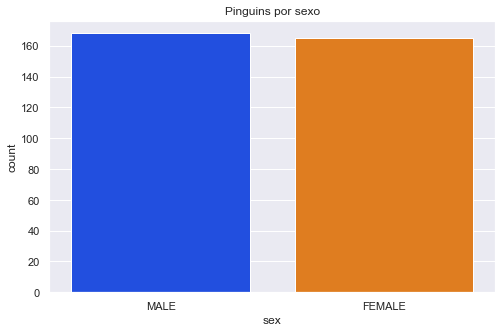

In [382]:
sequential_colors = sns.color_palette("bright", 4)
plt.figure(figsize=(8, 5))
sns.countplot(data=penguins_Size,x='sex',palette=sequential_colors).set(title='Pinguins por sexo')

<H2>Sexo por Espécie<H2>

In [383]:
Adelie = penguins_Size.query("species == 'Adelie'")
Chinstrap = penguins_Size.query("species == 'Chinstrap'")
Gentoo = penguins_Size.query("species == 'Gentoo'")

In [384]:
Adelie.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [385]:
Chinstrap.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [386]:
Gentoo.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,122.000000,122.000000,122.000000,122.000000
mean,47.529508,14.976230,217.188525,5077.663934
std,3.082386,0.983084,6.511696,505.862403
min,40.900000,13.100000,203.000000,3950.000000
25%,45.325000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5025.000000
75%,49.575000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


[Text(0.5, 1.0, 'Adelie')]

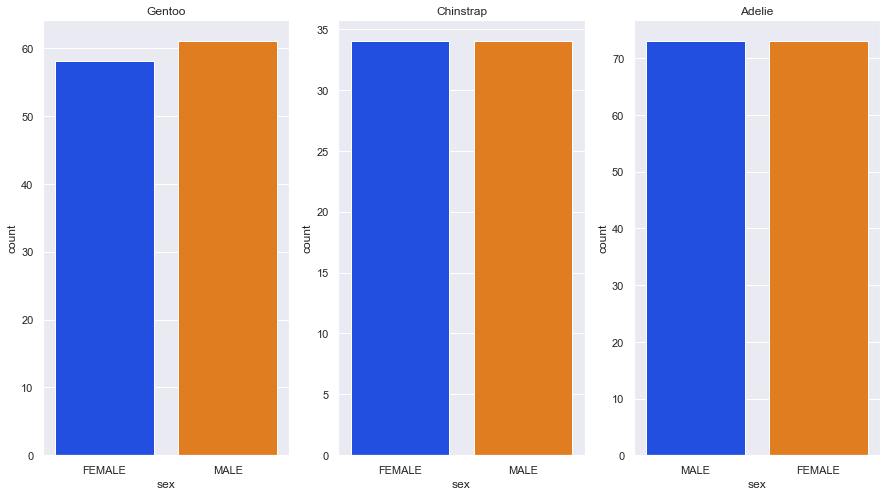

In [387]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
sns.countplot(data=Gentoo,x='sex',palette=sequential_colors,ax=axes[0]).set(title = 'Gentoo')
sns.countplot(data=Chinstrap,x='sex',palette=sequential_colors,ax=axes[1]).set(title="Chinstrap")
sns.countplot(data=Adelie,x='sex',palette=sequential_colors,ax=axes[2]).set(title = 'Adelie')

<H2>Sexo por Ilha<H2>

In [388]:
penguins_Size['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [389]:
Torgersen = penguins_Size.query("island == 'Torgersen'")
Biscoe = penguins_Size.query("island == 'Biscoe'")
Dream = penguins_Size.query("island == 'Dream'")

[Text(0.5, 1.0, 'Dream')]

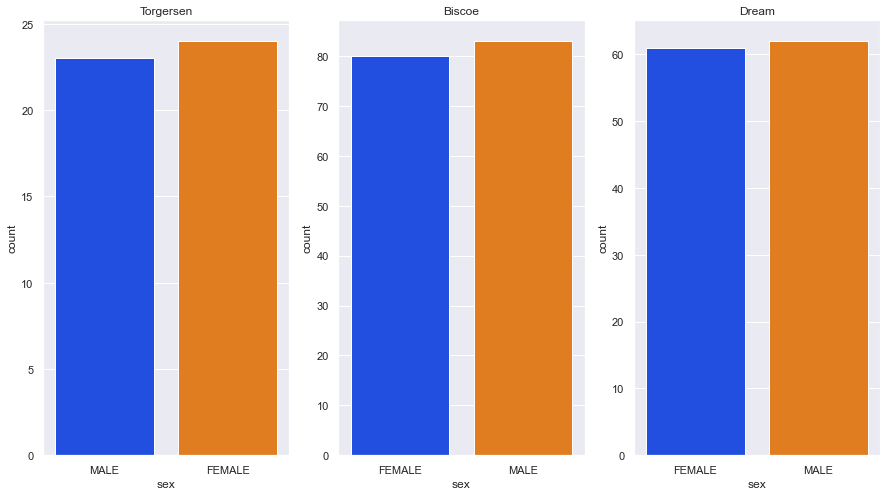

In [390]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
sns.countplot(data=Torgersen,x='sex',palette=sequential_colors,ax=axes[0]).set(title = 'Torgersen')
sns.countplot(data=Biscoe,x='sex',palette=sequential_colors,ax=axes[1]).set(title="Biscoe")
sns.countplot(data=Dream,x='sex',palette=sequential_colors,ax=axes[2]).set(title = 'Dream')

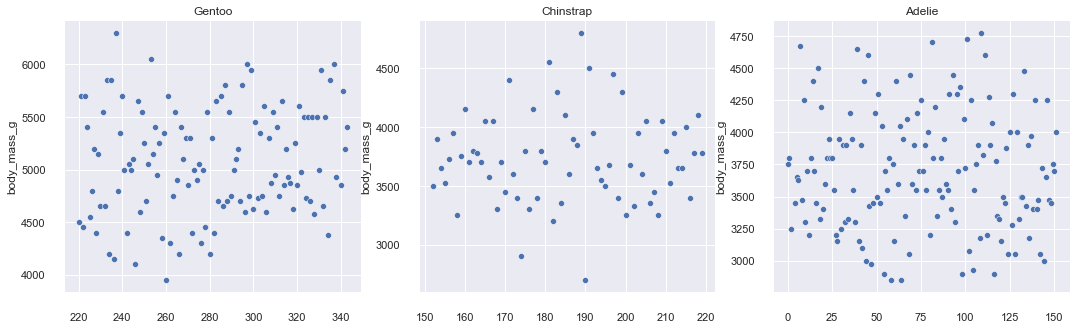

In [391]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=Gentoo['body_mass_g'],ax=axes[0]).set(title = 'Gentoo')
sns.scatterplot(data=Chinstrap['body_mass_g'],ax=axes[1]).set(title="Chinstrap")
sns.scatterplot(data=Adelie['body_mass_g'],ax=axes[2]).set(title = 'Adelie')
sns.despine(offset=10, trim=True)

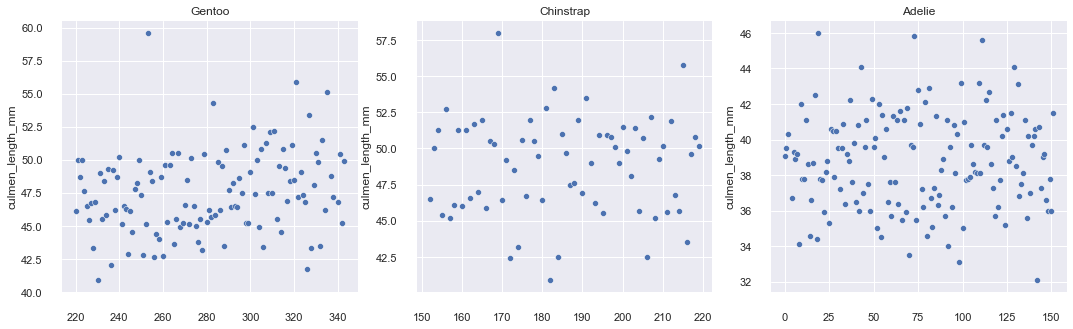

In [392]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=Gentoo['culmen_length_mm'],ax=axes[0]).set(title = 'Gentoo')
sns.scatterplot(data=Chinstrap['culmen_length_mm'],ax=axes[1]).set(title="Chinstrap")
sns.scatterplot(data=Adelie['culmen_length_mm'],ax=axes[2]).set(title = 'Adelie')
sns.despine(offset=10, trim=True)

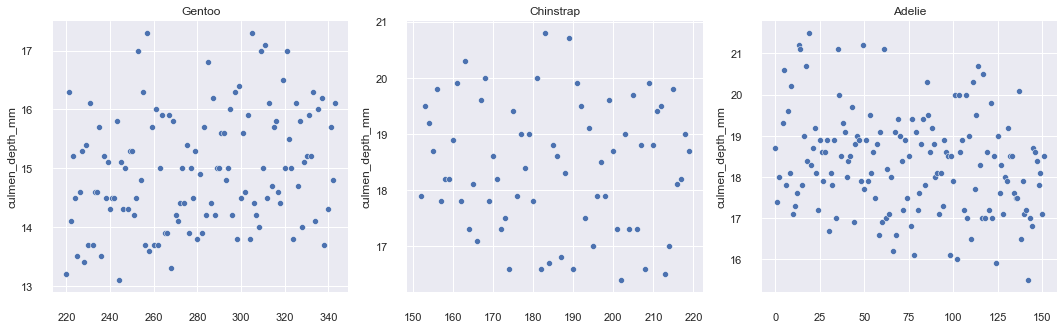

In [393]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=Gentoo['culmen_depth_mm'],ax=axes[0]).set(title = 'Gentoo')
sns.scatterplot(data=Chinstrap['culmen_depth_mm'],ax=axes[1]).set(title="Chinstrap")
sns.scatterplot(data=Adelie['culmen_depth_mm'],ax=axes[2]).set(title = 'Adelie')
sns.despine(offset=10, trim=True)

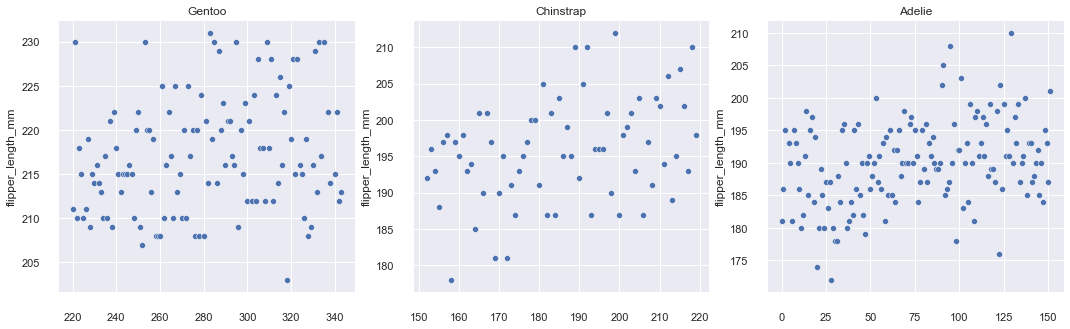

In [394]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=Gentoo['flipper_length_mm'],ax=axes[0]).set(title = 'Gentoo')
sns.scatterplot(data=Chinstrap['flipper_length_mm'],ax=axes[1]).set(title="Chinstrap")
sns.scatterplot(data=Adelie['flipper_length_mm'],ax=axes[2]).set(title = 'Adelie')
sns.despine(offset=10, trim=True)

[Text(0.5, 1.0, 'culmen length')]

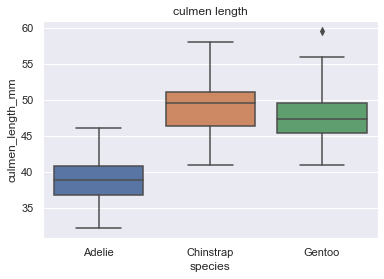

In [395]:
sns.boxplot(data=penguins_Size.query("species in ('Adelie','Chinstrap','Gentoo')"), x ='species',y = 'culmen_length_mm' ).set(title='culmen length')

[Text(0.5, 1.0, 'body mass')]

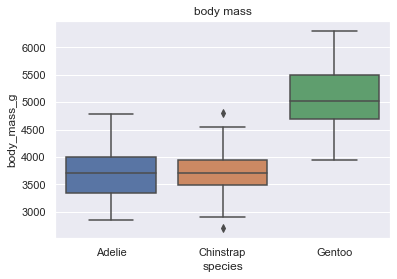

In [396]:
sns.boxplot(data=penguins_Size.query("species in ('Adelie','Chinstrap','Gentoo')"), x ='species',y = 'body_mass_g' ).set(title='body mass')

[Text(0.5, 1.0, 'flipper length')]

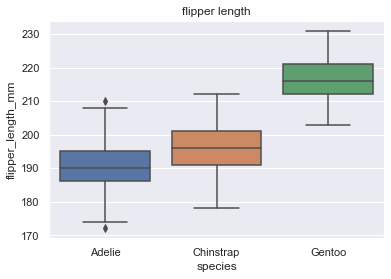

In [397]:
sns.boxplot(data=penguins_Size.query("species in ('Adelie','Chinstrap','Gentoo')"), x ='species',y = 'flipper_length_mm' ).set(title='flipper length')

[Text(0.5, 1.0, 'culmen depth')]

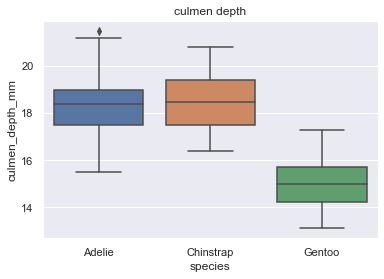

In [398]:
sns.boxplot(data=penguins_Size.query("species in ('Adelie','Chinstrap','Gentoo')"), x ='species',y = 'culmen_depth_mm' ).set(title='culmen depth')

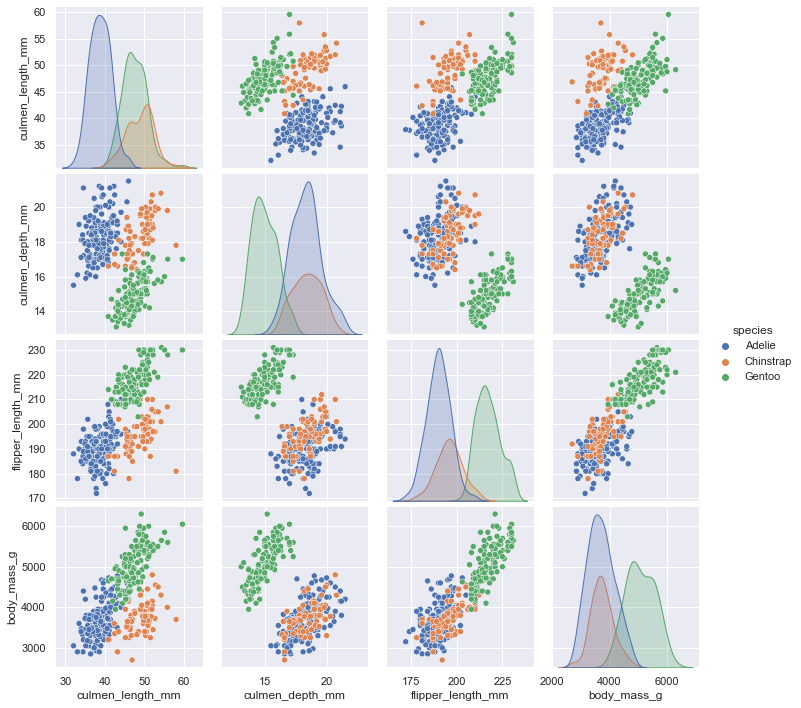

In [399]:
sns.pairplot(penguins_Size,hue='species')

<AxesSubplot:xlabel='body_mass_g', ylabel='culmen_length_mm'>

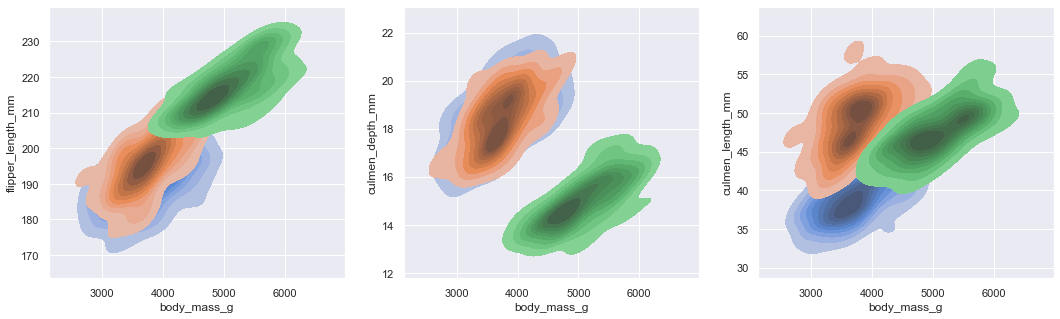

In [400]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.kdeplot(data=penguins_Size,x=Adelie['body_mass_g'],y=Adelie['flipper_length_mm'],ax=axes[0],fill=True)
sns.kdeplot(data=penguins_Size,x=Chinstrap['body_mass_g'],y=Chinstrap['flipper_length_mm'],ax=axes[0],fill=True)
sns.kdeplot(data=penguins_Size,x=Gentoo['body_mass_g'],y=Gentoo['flipper_length_mm'],ax=axes[0],fill=True)

sns.kdeplot(data=penguins_Size,x=Adelie['body_mass_g'],y=Adelie['culmen_depth_mm'],ax=axes[1],fill=True)
sns.kdeplot(data=penguins_Size,x=Chinstrap['body_mass_g'],y=Chinstrap['culmen_depth_mm'],ax=axes[1],fill=True)
sns.kdeplot(data=penguins_Size,x=Gentoo['body_mass_g'],y=Gentoo['culmen_depth_mm'],ax=axes[1],fill=True)

sns.kdeplot(data=penguins_Size,x=Adelie['body_mass_g'],y=Adelie['culmen_length_mm'],ax=axes[2],fill=True)
sns.kdeplot(data=penguins_Size,x=Chinstrap['body_mass_g'],y=Chinstrap['culmen_length_mm'],ax=axes[2],fill=True)
sns.kdeplot(data=penguins_Size,x=Gentoo['body_mass_g'],y=Gentoo['culmen_length_mm'],ax=axes[2],fill=True)


In [401]:
penguins_Size = penguins_Size.dropna()

In [402]:
#dummies = pd.get_dummies(penguins_Size['species'])
#dummies.rename(columns={'0':'Adelie'}, inplace=True)
#dummies.rename(columns={'1':'Gentoo'}, inplace=True)
#dummies.rename(columns={'2':'Chinstrap'}, inplace=True)

In [403]:
#penguins_Size = pd.concat([penguins_Size,dummies],axis='columns')

In [404]:
penguins_Size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [405]:
y = penguins_Size['species']

In [406]:
del penguins_Size['species']

In [407]:
penguins_Size

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [408]:
dummies = pd.get_dummies(penguins_Size['sex'])
dummies.rename(columns = {'0':'MALE'}, inplace=True)
dummies.rename(columns = {'1':'FEMALE'}, inplace=True)

In [409]:
penguins_Size = pd.concat([penguins_Size,dummies],axis='columns')

In [410]:
penguins_Size

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,0
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,0
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,0
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1
...,...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,1,0
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1,0
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,0,1
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1,0


In [411]:
del penguins_Size['sex']

In [412]:
dummies = pd.get_dummies(penguins_Size['island'])
dummies.rename(columns={'0':'Torgersen'}, inplace=True)
dummies.rename(columns={'1':'Biscoe'}, inplace=True)
dummies.rename(columns={'2':'Dream'}, inplace=True)
penguins_Size = pd.concat([penguins_Size,dummies],axis='columns')
del penguins_Size['island']

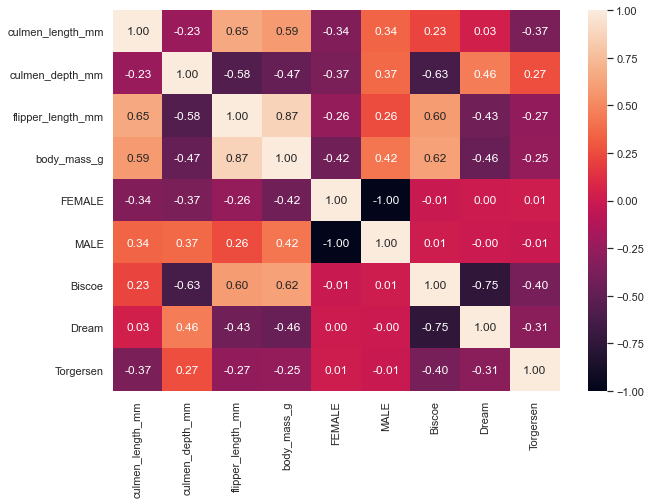

In [413]:
plt.figure(figsize=(10, 7))
sns.heatmap(penguins_Size.corr(),
            annot = True,
            fmt = '.2f')
plt.show()

In [414]:
penguins_Size

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,50.4,15.7,222.0,5750.0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [415]:
X = penguins_Size

In [416]:
def normalize(data):
    for column in data.columns: 
        data[column] = (data[column] - data[column].mean()) /data[column].std()     
    return data

In [417]:
X = normalize(X)

In [418]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
0,-0.894695,0.779559,-1.424608,-0.567621,-0.989542,0.989542,-0.977724,-0.76417,2.463094
1,-0.821552,0.119404,-1.067867,-0.505525,1.007534,-1.007534,-0.977724,-0.76417,2.463094
2,-0.675264,0.424091,-0.425733,-1.188572,1.007534,-1.007534,-0.977724,-0.76417,2.463094
4,-1.333559,1.084246,-0.568429,-0.940192,1.007534,-1.007534,-0.977724,-0.76417,2.463094
5,-0.858123,1.744400,-0.782474,-0.691811,-0.989542,0.989542,-0.977724,-0.76417,2.463094
...,...,...,...,...,...,...,...,...,...
338,0.586470,-1.759497,0.929884,0.891616,1.007534,-1.007534,1.019712,-0.76417,-0.404774
340,0.513326,-1.454811,1.001232,0.798473,1.007534,-1.007534,1.019712,-0.76417,-0.404774
341,1.171621,-0.743875,1.500670,1.916186,-0.989542,0.989542,1.019712,-0.76417,-0.404774
342,0.220750,-1.200905,0.787187,1.233139,1.007534,-1.007534,1.019712,-0.76417,-0.404774


In [419]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [420]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
302,0.623041,-1.302467,0.787187,0.643235,1.007534,-1.007534,1.019712,-0.76417,-0.404774
33,-0.565548,0.881121,-1.210563,-0.381335,-0.989542,0.989542,-0.977724,1.30468,-0.404774
121,-1.150699,1.338151,-0.211688,-0.878096,-0.989542,0.989542,-0.977724,-0.76417,2.463094
292,0.769329,-0.794656,1.429321,1.108949,-0.989542,0.989542,1.019712,-0.76417,-0.404774
149,-1.132413,0.474872,-0.568429,-0.567621,-0.989542,0.989542,-0.977724,1.30468,-0.404774
...,...,...,...,...,...,...,...,...,...
66,-1.552991,-0.489969,-0.425733,-1.064382,1.007534,-1.007534,1.019712,-0.76417,-0.404774
258,0.001318,-1.810279,0.501794,0.177521,1.007534,-1.007534,1.019712,-0.76417,-0.404774
244,-0.199828,-2.064184,1.001232,0.984758,1.007534,-1.007534,1.019712,-0.76417,-0.404774
332,-0.090112,-0.997781,0.858536,0.550092,1.007534,-1.007534,1.019712,-0.76417,-0.404774


In [421]:
rfc = RandomForestClassifier (n_estimators= 10, max_features= 'auto')

In [433]:
ACC = []
for i in range(60):
    rfc.fit (X_train, y_train)
    y_pred = rfc.predict(X_test)
    ACC.append(metrics.accuracy_score(y_test, y_pred)*100)

rfc.fit(X_train,y_train)

In [438]:
print("Accuracy:",ACC)

Accuracy: [98.50746268656717, 98.50746268656717, 97.01492537313433, 98.50746268656717, 100.0, 98.50746268656717, 100.0, 100.0, 100.0, 100.0, 100.0, 98.50746268656717, 97.01492537313433, 98.50746268656717, 97.01492537313433, 100.0, 98.50746268656717, 100.0, 97.01492537313433, 97.01492537313433, 97.01492537313433, 97.01492537313433, 98.50746268656717, 98.50746268656717, 100.0, 98.50746268656717, 97.01492537313433, 100.0, 98.50746268656717, 98.50746268656717, 100.0, 97.01492537313433, 98.50746268656717, 98.50746268656717, 98.50746268656717, 100.0, 100.0, 98.50746268656717, 98.50746268656717, 98.50746268656717, 100.0, 98.50746268656717, 98.50746268656717, 97.01492537313433, 100.0, 98.50746268656717, 98.50746268656717, 98.50746268656717, 98.50746268656717, 100.0, 100.0, 100.0, 98.50746268656717, 100.0, 100.0, 98.50746268656717, 98.50746268656717, 100.0, 100.0, 100.0]
97.01492537313433


In [439]:
print(min(ACC))

97.01492537313433


In [424]:
y_pred

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo'], dtype=object)

In [447]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
180,0.440182,0.322529,-0.711125,-0.629716,1.007534,-1.007534,-0.977724,1.30468,-0.404774
6,-0.931267,0.322529,-1.424608,-0.722858,1.007534,-1.007534,-0.977724,-0.76417,2.463094
39,-0.766694,0.982683,-1.210563,0.550092,-0.989542,0.989542,-0.977724,1.30468,-0.404774
239,0.860759,-1.048562,1.500670,1.419424,-0.989542,0.989542,1.019712,-0.76417,-0.404774
212,1.445911,1.185808,0.359098,-0.319240,-0.989542,0.989542,-0.977724,1.30468,-0.404774
...,...,...,...,...,...,...,...,...,...
293,0.458468,-1.200905,1.143928,1.233139,1.007534,-1.007534,1.019712,-0.76417,-0.404774
283,1.884775,-0.743875,2.142804,1.791995,-0.989542,0.989542,1.019712,-0.76417,-0.404774
13,-0.986125,2.049087,-0.711125,-0.505525,-0.989542,0.989542,-0.977724,-0.76417,2.463094
194,1.263051,0.982683,-0.354384,-0.816001,-0.989542,0.989542,-0.977724,1.30468,-0.404774


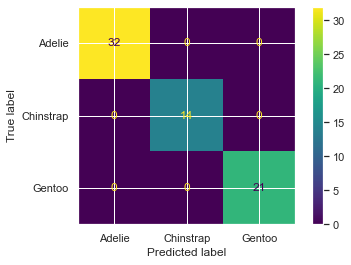

In [426]:
plot_confusion_matrix (rfc,X_test, y_test)

In [427]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        21

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



[Text(697.5, 1009.5428571428572, 'flipper_length_mm <= 0.466\ngini = 0.645\nsamples = 173\nvalue = [111, 58, 97]'),
 Text(403.0, 854.2285714285715, 'flipper_length_mm <= -0.533\ngini = 0.447\nsamples = 109\nvalue = [110, 56, 0]'),
 Text(248.0, 698.9142857142858, 'body_mass_g <= -0.521\ngini = 0.338\nsamples = 66\nvalue = [80, 22, 0]'),
 Text(124.0, 543.6, 'culmen_length_mm <= -0.383\ngini = 0.403\nsamples = 48\nvalue = [54, 21, 0]'),
 Text(62.0, 388.28571428571433, 'gini = 0.0\nsamples = 35\nvalue = [54, 0, 0]'),
 Text(186.0, 388.28571428571433, 'gini = 0.0\nsamples = 13\nvalue = [0, 21, 0]'),
 Text(372.0, 543.6, 'culmen_depth_mm <= 1.084\ngini = 0.071\nsamples = 18\nvalue = [26, 1, 0]'),
 Text(310.0, 388.28571428571433, 'gini = 0.0\nsamples = 14\nvalue = [21, 0, 0]'),
 Text(434.0, 388.28571428571433, 'flipper_length_mm <= -0.675\ngini = 0.278\nsamples = 4\nvalue = [5, 1, 0]'),
 Text(372.0, 232.97142857142865, 'gini = 0.0\nsamples = 2\nvalue = [3, 0, 0]'),
 Text(496.0, 232.971428571428

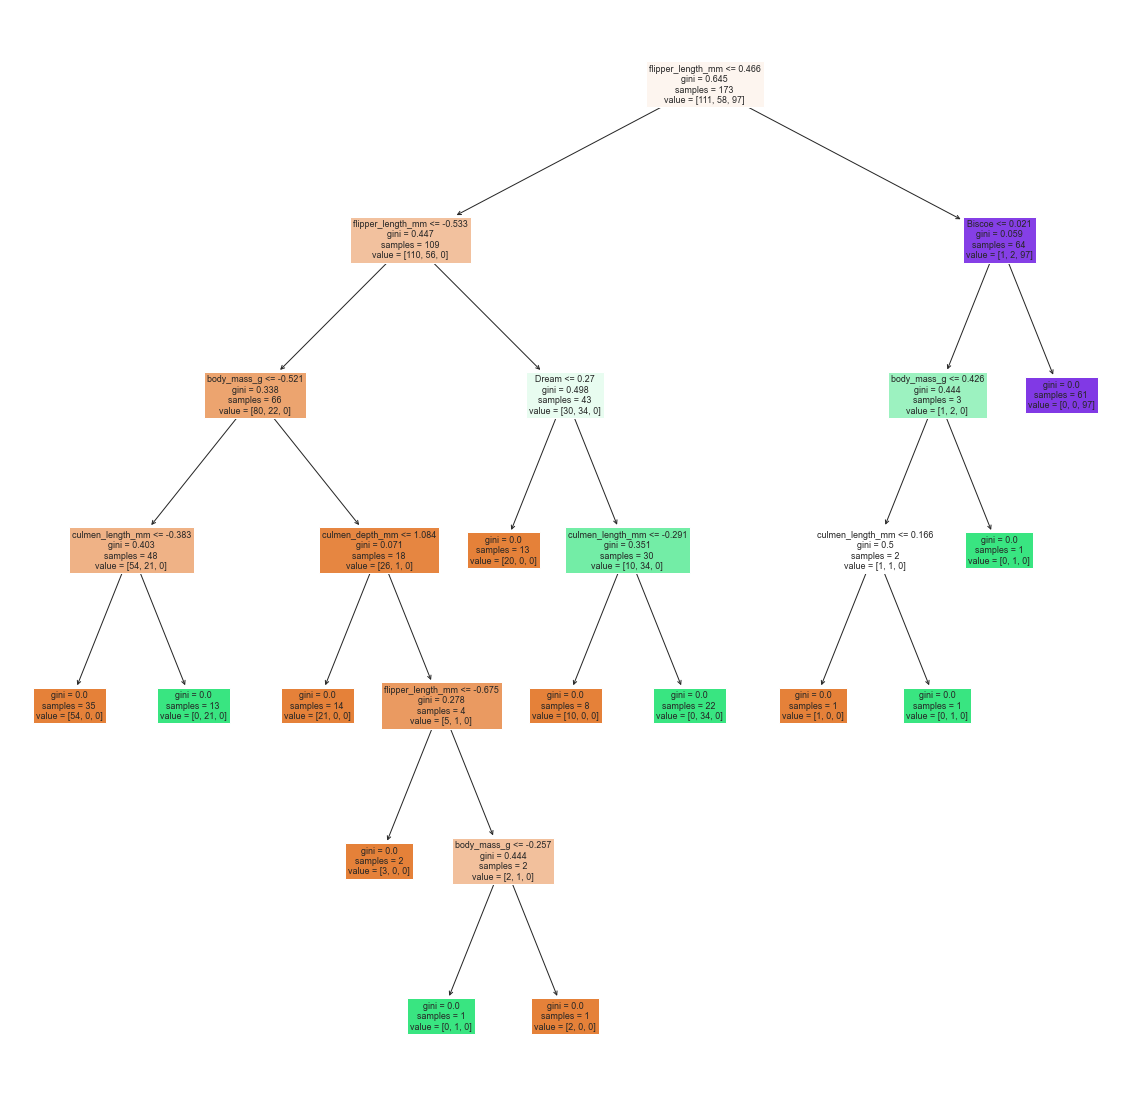

In [428]:
from sklearn import tree
from sklearn.tree import export_graphviz
plt.figure(figsize=(20,20))
tree.plot_tree(rfc.estimators_[5], feature_names=X.columns, filled=True)